# Uberschrift #

In [229]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [247]:
df_chacha1 = pd.read_csv('TanzDaten\\chacha1\\Linear Acceleration.csv')
#df_chacha2 = pd.read_csv('TanzDaten\\chacha2\\Linear Acceleration.csv')
df_rumba1 = pd.read_csv('TanzDaten\\rumba1\\Linear Acceleration.csv')
df_jive1 = pd.read_csv('TanzDaten\\jive1\\Linear Acceleration.csv')
df_samba1 = pd.read_csv('TanzDaten\\samba1\\Linear Acceleration.csv')
#df_lwalzer1 = pd.read_csv('TanzDaten\\lwalzer1\\Linear Acceleration.csv')
#df_tango1 = pd.read_csv('TanzDaten\\tango1\\Linear Acceleration.csv')

In [166]:
print(df_chacha1.shape)
print(df_rumba1.shape)
print(df_jive1.shape)
print(df_samba1.shape)

(6252, 5)
(10049, 5)
(9589, 5)
(5515, 5)


# Decision Tree #

In [12]:
def prep_df(df, label, bin_size=5):
    df.columns = ['time', 'x', 'y', 'z']

    bins = list(range(0, int(np.ceil(df['time'].max()+bin_size)), bin_size))
    df['bin'] = pd.cut(df['time'], bins=bins, labels=bins[0:-1])

    custom_agg = {
        'x': ['mean', 'max', 'min', 'var'],
        'y': ['mean', 'max', 'min', 'var'],
        'z': ['mean', 'max', 'min', 'var']
    }

    result = df.groupby('bin').agg(custom_agg).reset_index()
    result.drop('bin', axis=1, inplace=True)
    result.columns = [' '.join(col).strip() for col in result.columns.values]
    result['label'] = label

    return result

In [13]:
bin_size=10

In [14]:
df_features = prep_df(df_chacha1, 'chacha', bin_size)
print(df_features.head())
print(df_features.shape)

     x mean     x max     x min     x var    y mean     y max     y min  \
0 -0.032035  3.396266 -3.475503  1.654390  0.224375  4.705453 -2.070337   
1 -0.029507  4.539084 -8.444817  2.044867  0.221708  4.507174 -2.353144   
2 -0.187964  5.376016 -7.268412  1.978608  0.085017  3.711990 -4.914500   
3 -0.295236  3.347499 -4.603240  1.625851  0.338989  2.944685 -2.978164   
4 -0.234531  4.445667 -4.780134  2.010440  0.690004  5.026338 -2.791822   

      y var    z mean     z max     z min     z var   label  
0  0.992573 -0.176783  6.154903 -3.401186  1.189635  chacha  
1  1.404928  0.029182  3.275749 -2.624024  1.359661  chacha  
2  1.010728 -0.021645  2.293734 -4.104889  0.774914  chacha  
3  1.093162 -0.281718  2.534860 -3.500268  1.038788  chacha  
4  1.557225 -0.354330  3.530463 -3.632708  1.353948  chacha  
(12, 13)


C:\Users\benja\AppData\Local\Temp\ipykernel_11840\1558260659.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  result.drop('bin', axis=1, inplace=True)


In [15]:
df_features = df_features.append([prep_df(df_rumba1, 'rumba', bin_size),
                    prep_df(df_jive1, 'jive', bin_size),
                    prep_df(df_samba1, 'samba', bin_size)
                    ])
print(df_features.head())
print(df_features.shape)

     x mean     x max     x min     x var    y mean     y max     y min  \
0 -0.032035  3.396266 -3.475503  1.654390  0.224375  4.705453 -2.070337   
1 -0.029507  4.539084 -8.444817  2.044867  0.221708  4.507174 -2.353144   
2 -0.187964  5.376016 -7.268412  1.978608  0.085017  3.711990 -4.914500   
3 -0.295236  3.347499 -4.603240  1.625851  0.338989  2.944685 -2.978164   
4 -0.234531  4.445667 -4.780134  2.010440  0.690004  5.026338 -2.791822   

      y var    z mean     z max     z min     z var   label  
0  0.992573 -0.176783  6.154903 -3.401186  1.189635  chacha  
1  1.404928  0.029182  3.275749 -2.624024  1.359661  chacha  
2  1.010728 -0.021645  2.293734 -4.104889  0.774914  chacha  
3  1.093162 -0.281718  2.534860 -3.500268  1.038788  chacha  
4  1.557225 -0.354330  3.530463 -3.632708  1.353948  chacha  
(61, 13)


C:\Users\benja\AppData\Local\Temp\ipykernel_11840\1558260659.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  result.drop('bin', axis=1, inplace=True)
C:\Users\benja\AppData\Local\Temp\ipykernel_11840\1558260659.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  result.drop('bin', axis=1, inplace=True)
C:\Users\benja\AppData\Local\Temp\ipykernel_11840\1558260659.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  result.drop('bin', axis=1, inplace=True)
C:\Users\benja\AppData\Local\Temp\ipykernel_11840\1360374103.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append([prep_df(df_rumba1, 'rumba', bin_size),


In [156]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [163]:
X = df_features[list(df_features.columns)[:-1]]
y = df_features['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42, 12)
(42,)
(19, 12)
(19,)


In [144]:
param_grid = {'n_estimators': [100, 200, 400, 800],
              'max_depth': np.linspace(2, 8, 8, endpoint=True),
              'min_samples_split': [2,3,4,6,8]}


In [145]:
#clf = tree.DecisionTreeClassifier(max_depth=3)
#clf.fit(X_train, y_train)
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
#rf_random.fit(train_features, train_labels)

In [146]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 160 candidates, totalling 480 fits


{'max_depth': 2.857142857142857, 'min_samples_split': 8, 'n_estimators': 400}

In [161]:
rf_best = RandomForestClassifier(n_estimators=400, max_depth=3, min_samples_split=8)
rf_best.fit(X_train, y_train)
print("Training score: " + str(rf_best.score(X_train, y_train)))
print("Training score: " + str(rf_best.score(X_test, y_test)))

Training score: 0.9523809523809523
Training score: 0.631578947368421


In [164]:
scores = cross_val_score(rf_best, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.67 accuracy with a standard deviation of 0.15


In [125]:
print("Training score: " + str(clf.score(X_train, y_train)))
print("Training score: " + str(clf.score(X_test, y_test)))

#y_pred = clf.predict(X_test)
#accuracy_score(y_test, y_pred)
# more evaluation

Training score: 0.9761904761904762
Training score: 0.7368421052631579


In [ ]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

# Hypothesis Test :) #

In [188]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import mannwhitneyu

In [203]:
df_chacha1.columns = ['time', 'x', 'y', 'z']
df_rumba1.columns = ['time', 'x', 'y', 'z']
df_jive1.columns = ['time', 'x', 'y', 'z']
df_samba1.columns = ['time', 'x', 'y', 'z']

In [249]:
def prep_df(df, label, bin_size=5):
    df.columns = ['time', 'x', 'y', 'z']
    df['mag'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)


    bins = list(range(0, int(np.ceil(df['time'].max()+bin_size)), bin_size))
    df['bin'] = pd.cut(df['time'], bins=bins, labels=bins[0:-1])

    custom_agg = {
        'x': ['mean', 'max', 'min', 'var'],
        'y': ['mean', 'max', 'min', 'var'],
        'z': ['mean', 'max', 'min', 'var'],
        'mag': ['mean', 'max', 'min', 'var']
    }

    result = df.groupby('bin').agg(custom_agg).reset_index()
    result.drop('bin', axis=1, inplace=True)
    result.columns = [' '.join(col).strip() for col in result.columns.values]
    result['label'] = label

    return result

In [250]:
df_c = prep_df(df_chacha1, 'chacha')
df_r = prep_df(df_rumba1, 'rumba')
df_j = prep_df(df_jive1, 'rumba')
df_s = prep_df(df_samba1, 'rumba')

C:\Users\benja\AppData\Local\Temp\ipykernel_11840\1294848126.py:17: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  result.drop('bin', axis=1, inplace=True)
C:\Users\benja\AppData\Local\Temp\ipykernel_11840\1294848126.py:17: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  result.drop('bin', axis=1, inplace=True)
C:\Users\benja\AppData\Local\Temp\ipykernel_11840\1294848126.py:17: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  result.drop('bin', axis=1, inplace=True)
C:\Users\benja\AppData\Local\Temp\ipykernel_11840\1294848126.py:17: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  result.drop('bin', axis=1, inplace=True)


In [282]:
stat, p_value = mannwhitneyu(df_j['mag min'], df_s['mag min'])

print(f'Statistic: {stat}')
print(f'P-value: {p_value}')

Statistic: 333.0
P-value: 0.3735464429019998


In [289]:
df_c['mag mean']

0     2.074251
1     1.268964
2     1.769992
3     2.002857
4     1.057982
5     1.936105
6     1.634958
7     1.868731
8     2.238230
9     1.910879
10    2.276701
11    2.420881
12    1.678254
13    1.879696
14    2.016099
15    1.269860
16    2.283866
17    2.208117
18    1.926544
19    1.854841
20    2.396748
21    2.532920
22    2.286577
23    1.105752
Name: mag mean, dtype: float64

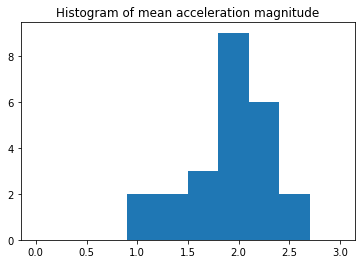

In [297]:
plt.hist(df_c['mag mean'], range=(0,3))
plt.title('Histogram of mean acceleration magnitudes (Cha-Cha)')
plt.show()

In [246]:
stat, p_value = mannwhitneyu(df['mag mean'], df2['mag mean'])

print(f'Statistic: {stat}')
print(f'P-value: {p_value}')

Statistic: 95.0
P-value: 1.8895696945718977e-07


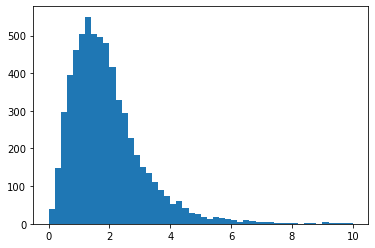

In [283]:
plt.hist(df_chacha1['mag'], bins=50, range=(0,10))
plt.title('Histogram of mean acceleration magnitude')
plt.show()

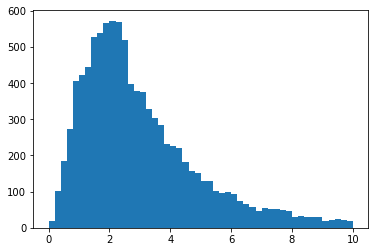

In [196]:
plt.hist(df_rumba1['mag'], bins=50, range=(0,10))
plt.show()

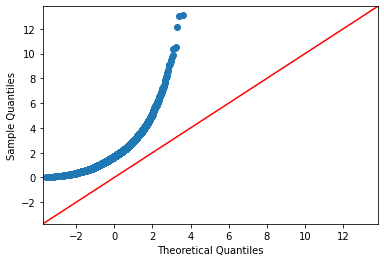

In [183]:
fig = sm.qqplot(df_chacha1['mag'], line='45')
plt.show()

In [190]:
stat, p_value = mannwhitneyu(df_chacha1['mag'], df_rumba1['mag'])

print(f'Statistic: {stat}')
print(f'P-value: {p_value}')

Statistic: 19485643.0
P-value: 0.0
